
## Data Visualization using Credit Risk model Data




### 3. Data Preprocessing :
Pre-processing refers to the transformations applied to the data before feeding it to the algorithm. Data Preprocessing Includes Data Collection , Cleaning ,Conversion of features , Imputing missing data ,features standardizations , feature scaling and identify new potential features.

#### Available Data set
   For this article, I have used a Data From (Need to be added ) data set from You can download the final training and testing data set from here:           
                
Lets get started by importing important packages and the data set.

In [29]:
%pylab inline 
import pandas as pd
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
# special matplotlib argument for improved plots
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
#from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.extmath import density

import sys
from time import time
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve


import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic 


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Data loading and Data cleaning :
Data is loaded into the DataFrame. Then we have  this renamed All variables  for Better Understanding.
- Convert the Loan Status as Charged off as 1 and Fully repaid as 0 .
- Removing non numeric charaters from from Features like  $ , ',' ,! and other alphabets which are not suitable for data analasis.


In [30]:
# data uploded into the data frame  
loan_data_df  = pd.read_csv('LoansTrainingSet.csv')

#convert the loan status into number;
loan_data_df['flag'] = loan_data_df['Loan Status'].replace(['Charged Off' ,'Fully Paid'], 
                     [1, 0]) ;

# Rename All Columns :
loan_data =loan_data_df.rename(columns = {'Loan ID':'loan_id' ,\
                                          'Customer ID' :'customer_id' ,\
                                          'Loan Status' :'loan_status',\
                                          'Current Loan Amount' : 'current_loan_amount' ,\
                                          'Term' :'term',\
                                          'Credit Score':'credit_score' ,\
                                          'Years in current job' : 'years_in_current_job',\
                                          'Home Ownership' :'home_ownership' ,\
                                          'Annual Income' :'annual_income' ,\
                                          'Purpose' :'purpose',\
                                          'Monthly Debt' :'monthly_debt',\
                                          'Years of Credit History' :'years_of_credit_history' ,\
                                          'Months since last delinquent' :'months_since_last_delinquent',
                                          'Number of Open Accounts' : 'number_of_open_accounts' ,
                                          'Number of Credit Problems': 'number_of_credit_problems',
                                          'Current Credit Balance' : 'current_credit_balance' ,
                                          'Maximum Open Credit' :'maximum_open_credit',
                                          'Bankruptcies':'bankruptcies',
                                          'Tax Liens' :'tax_liens',
                                          'flag' :'defaulter_or_not'

                                           
                                           })





# Removing non numeric characters from the features columns
# This should be uncomment
loan_data['purpose'] =   map(lambda x: x.lower(), loan_data['purpose'])
#loan_data['monthly_debt'] = [x[1:] for x in loan_data['monthly_debt']]
#loan_data['monthly_debt'] = loan_data["monthly_debt"].str.replace(",", "").astype(float)
#loan_data = loan_data[loan_data['maximum_open_credit'] != '#VALUE!']
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 20 columns):
loan_id                         256984 non-null object
customer_id                     256984 non-null object
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
term                            256984 non-null object
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null object
home_ownership                  256984 non-null object
annual_income                   195308 non-null float64
purpose                         256984 non-null object
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_

### Drop Unnecessray Columns

- We have found two columns which is not necessary for our Analysis. There for we dropped this column from our analysis .

In [31]:
# Drop few columns which are not necessary for Modelling data .

loan_data.drop('loan_id' , axis =1 , inplace=True)
loan_data.drop('customer_id',axis =1 , inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 18 columns):
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
term                            256984 non-null object
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null object
home_ownership                  256984 non-null object
annual_income                   195308 non-null float64
purpose                         256984 non-null object
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_open_credit             256980 non-null float64
bankruptcies                    256455 non-null float64
tax_li

## Years in current job :  
We could leave 'years_in_current_job' as categorical data, but it shouldn't be treated as such or as ordinal data since the intervals are easy to determine. We can convert it into numerical data with a simple filter



In [32]:
loan_data.years_in_current_job.value_counts()
 

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
n/a          11476
9 years       9932
Name: years_in_current_job, dtype: int64

In [33]:
loan_data.replace('n/a', np.nan,inplace=True)
loan_data.years_in_current_job.fillna(value=0,inplace=True)
loan_data['years_in_current_job'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_data['years_in_current_job'] = loan_data['years_in_current_job'].astype(int)
loan_data.years_in_current_job.value_counts()


10    78896
1     37758
2     23462
3     20659
5     17864
4     16166
6     14597
7     13968
8     12206
0     11476
9      9932
Name: years_in_current_job, dtype: int64

Let us analyze the purpose columns and analyze it impacts

In [34]:
print loan_data.purpose.value_counts()
print ''


debt consolidation      203911
other                    23935
home improvements        14915
business loan             4712
buy a car                 3276
medical bills             2868
take a trip               1570
buy house                 1530
educational expenses       267
Name: purpose, dtype: int64



### 4.Exploratory Data Analaysis :
In this section, we are going to investigate probability distributions of continuous random variables, that is, random variables whose support S contains an infinite interval of possible outcomes. 
#### Exploring Continuous Data :
Discrete data are, again, data with a finite or countably infinite number of possible outcomes. Continuous data, on the other hand, are data which come from an interval of possible outcomes.In our Data set examples of continuous variables include :
   - Current loan amount           
   - Credit score                  
   - Years in current job          
   - Annual income                 
   - Monthly debt                  
   - Years of credit history       
   - Months since last delinquent  
   - Number of open accounts       
   - Number of credit problems     
   - Current credit balance        
   - Maximum open credit      
   
In each of these examples, the resulting measurement comes from an interval of possible outcomes. and the measurement tool is often the restricting factor with continuous data. We'll summarize the data graphically using histograms, stem-and-leaf plots, and box plots.Here, we'll investigate how to summarize continuous data numerically using order statistics and various functions of order statistics.


In [35]:
def calculate_percentage(r ) :
    return r *100 / len(loan_data)




import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic 

ct = pd.crosstab(loan_data["defaulter_or_not"],loan_data["purpose"] )






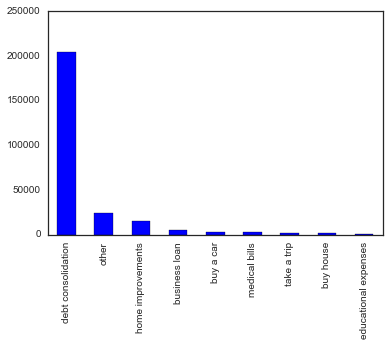

In [36]:
loan_data.purpose.value_counts().plot(kind ="bar")

ctplus = ct + 1e-8



Similarly we can Convert term , home_ownership into categorical variables. and before this let us obseve the pattern 
of the data and observe the trends .


(<matplotlib.figure.Figure at 0x3f682b0>,
 OrderedDict([(('Long Term', '0'), (0.0, 0.0, 0.24916664392159926, 0.53617582528932672)), (('Long Term', '1'), (0.0, 0.53949808442553937, 0.24916664392159926, 0.46050191557446057)), (('Short Term', '0'), (0.25414176829970875, 0.0, 0.7458582317002913, 0.73249336100717077)), (('Short Term', '1'), (0.25414176829970875, 0.73581562014338331, 0.7458582317002913, 0.26418437985661652))]))

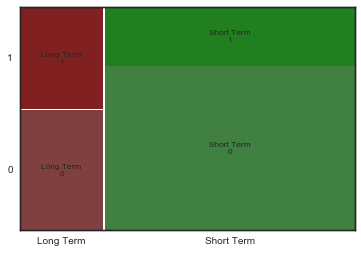

In [37]:
ct = pd.crosstab(loan_data["defaulter_or_not"],loan_data["term"] ).apply(calculate_percentage)
ctplus = ct + 1e-8
mosaic(ctplus.unstack())

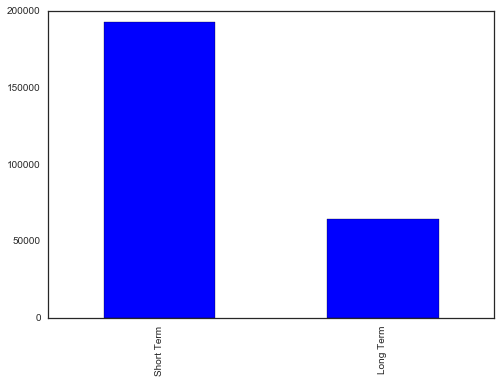

In [56]:
loan_data.term.value_counts().plot(kind ="bar")

(<matplotlib.figure.Figure at 0x195c27b8>,
 OrderedDict([(('HaveMortgage', '0'), (0.0, 0.0, 0.002200593389332168, 0.73622186393697076)), (('HaveMortgage', '1'), (0.0, 0.73954412307318329, 0.002200593389332168, 0.26045587692681654)), (('Home Mortgage', '0'), (0.0071267017637164035, 0.0, 0.47721818625351226, 0.71507426265239959)), (('Home Mortgage', '1'), (0.0071267017637164035, 0.71839652178861213, 0.47721818625351226, 0.2816034782113877)), (('Own Home', '0'), (0.4892709963916129, 0.0, 0.08788187780473425, 0.67106069203918961)), (('Own Home', '1'), (0.4892709963916129, 0.67438295117540215, 0.08788187780473425, 0.32561704882459774)), (('Rent', '0'), (0.5820789825707314, 0.0, 0.41792101742926846, 0.649390268918703)), (('Rent', '1'), (0.5820789825707314, 0.65271252805491553, 0.41792101742926846, 0.34728747194508436))]))

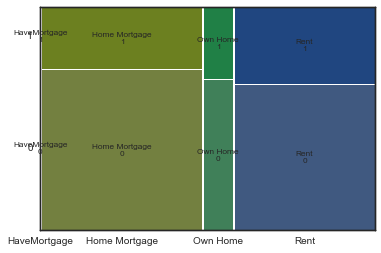

In [38]:
ct = pd.crosstab(loan_data["defaulter_or_not"],loan_data["home_ownership"] ).apply(calculate_percentage)
ctplus =  ct + 1e-8
mosaic(ctplus.unstack())


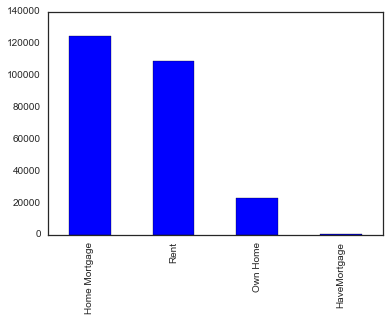

In [39]:
loan_data.home_ownership.value_counts().plot(kind ="bar")

In [40]:
defaulter = loan_data[['current_loan_amount' ,'credit_score','years_in_current_job','annual_income','monthly_debt','years_of_credit_history', \
                      'months_since_last_delinquent', 'number_of_open_accounts' ,'number_of_credit_problems' ,\
                       'current_credit_balance' ,  'maximum_open_credit']].loc[loan_data['defaulter_or_not'] == 1]

defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80793 entries, 6 to 256982
Data columns (total 11 columns):
current_loan_amount             80793 non-null int64
credit_score                    61326 non-null float64
years_in_current_job            80793 non-null int32
annual_income                   61326 non-null float64
monthly_debt                    80793 non-null float64
years_of_credit_history         80793 non-null float64
months_since_last_delinquent    37488 non-null float64
number_of_open_accounts         80793 non-null int64
number_of_credit_problems       80793 non-null int64
current_credit_balance          80793 non-null int64
maximum_open_credit             80789 non-null float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 7.1 MB


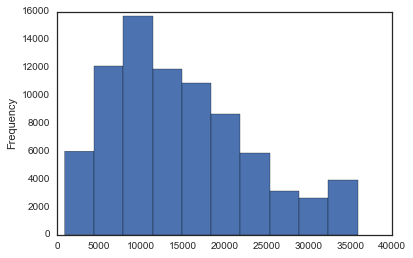

In [41]:
ser = pd.Series(defaulter['current_loan_amount'])

defaulter['current_loan_amount'].plot(kind ="hist")


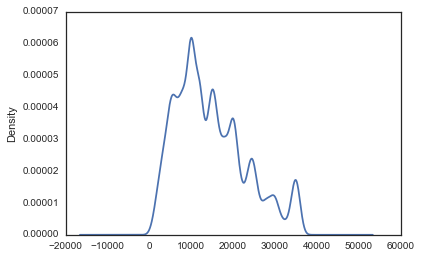

In [42]:
ser.plot.kde()

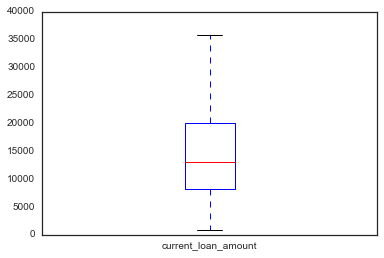

In [43]:
defaulter['current_loan_amount'].plot(kind ="box")

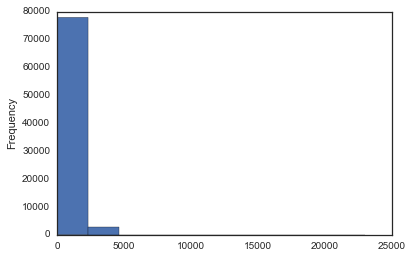

In [44]:
ser = pd.Series(defaulter['monthly_debt'])

defaulter['monthly_debt'].plot(kind ="hist")





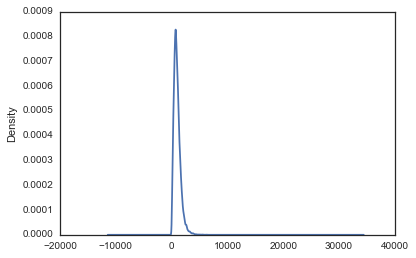

In [45]:
ser.plot.kde()

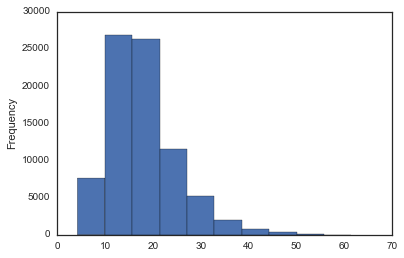

In [46]:
ser = pd.Series(defaulter['years_of_credit_history'])

defaulter['years_of_credit_history'].plot(kind ="hist")


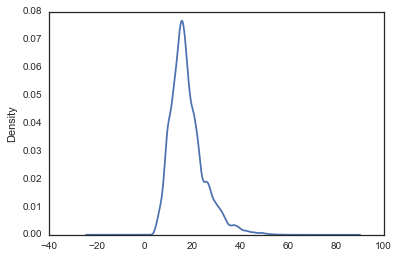

In [47]:
ser.plot.kde()

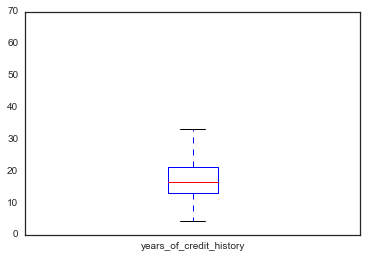

In [48]:

defaulter['years_of_credit_history'].plot(kind ="box")

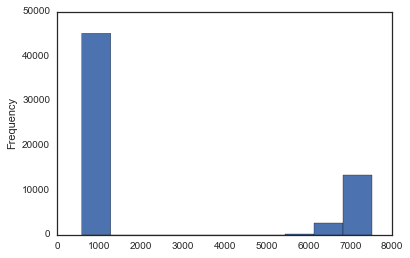

In [49]:
ser = pd.Series(defaulter['credit_score'])

defaulter['credit_score'].plot(kind ="hist")


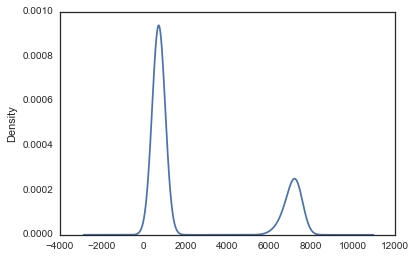

In [50]:
ser.plot.kde()

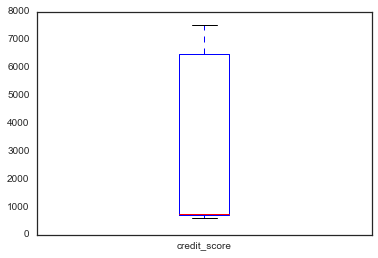

In [51]:
defaulter['credit_score'].plot(kind ="box")

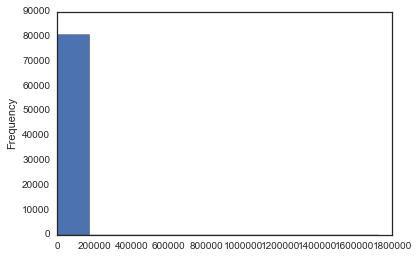

In [52]:
ser = pd.Series(defaulter['current_credit_balance'])

defaulter['current_credit_balance'].plot(kind ="hist")

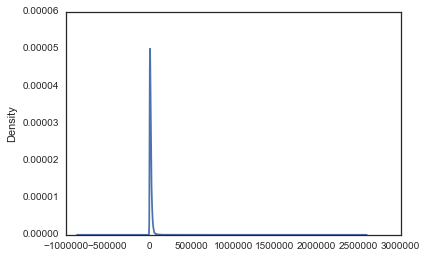

In [53]:
ser.plot.kde()

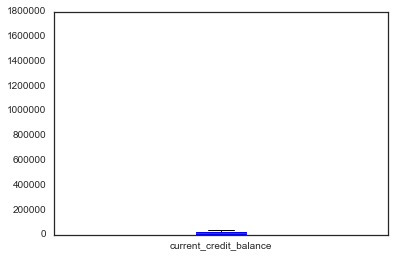

In [54]:
defaulter['current_credit_balance'].plot(kind ="box")

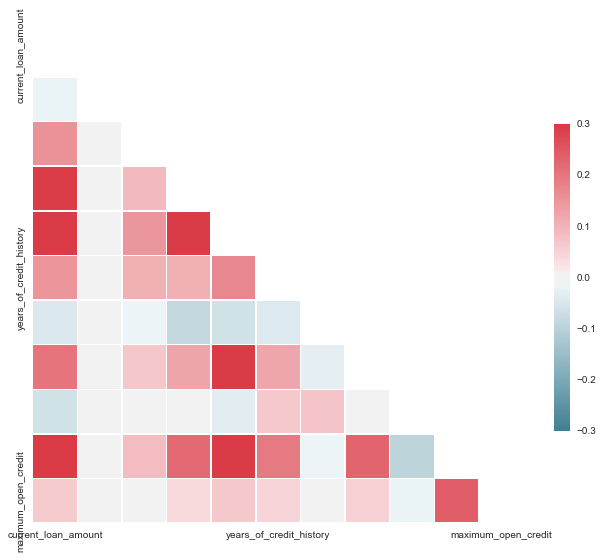

In [55]:
"""
Plotting a diagonal correlation matrix
======================================

_thumb: .3, .6
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = defaulter.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)